# Análise de correlação entre os votos em partidos (PL e PT) e atributos socioeconômicos.

In [45]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Dados
dep_fed_results = pd.read_csv('data/dep_fed_results.csv')
distribuicao_populacao = pd.read_csv('data/distribuicao_populacao.csv')
pib_municipios = pd.read_csv('data/pib_municipios.csv')
municipios = gpd.read_file('data/SC_Municipios_2023/SC_Municipios_2023.shp')

In [47]:
# Padronizar nomes dos municípios
dep_fed_results['nm_municipio'] = dep_fed_results['nm_municipio'].str.upper()
distribuicao_populacao['nm_mun'] = distribuicao_populacao['nm_mun'].str.upper()
pib_municipios['nm_mun'] = pib_municipios['nm_mun'].str.upper()
municipios['NM_MUN'] = municipios['NM_MUN'].str.upper()

In [48]:
# Filtrar dados relevantes
pib_municipios = pib_municipios[pib_municipios['sg_uf'] == 'SC']
pib_municipios = pib_municipios[pib_municipios['ano'] == 2020]

In [49]:
# Partidos analisados: PT e PL
partidos_interesse = ['PL', 'PT']
dep_fed_results_pl_pt = dep_fed_results[dep_fed_results['sg_partido'].isin(partidos_interesse)]

In [50]:
# Votos por município para cada partido
votos_por_municipio_partido = dep_fed_results_pl_pt.groupby(['nm_municipio', 'sg_partido'])['qt_votos_nominais'].sum().reset_index()

In [51]:
# Merge das informações das diferentes fontes
dados_completos = votos_por_municipio_partido.merge(distribuicao_populacao, left_on='nm_municipio', right_on='nm_mun', how='left')
dados_completos = dados_completos.merge(pib_municipios[['nm_mun', 'pib', 'pip_per_capita']], on='nm_mun', how='left')

In [54]:
# Obter % dos votos para cada instância
dados_completos['perc_votos'] = dados_completos['qt_votos_nominais'] / dados_completos['tot_pop']

In [55]:
# Separação entre PL e PT
dados_pt = dados_completos[dados_completos['sg_partido'] == 'PT']
dados_pl = dados_completos[dados_completos['sg_partido'] == 'PL']

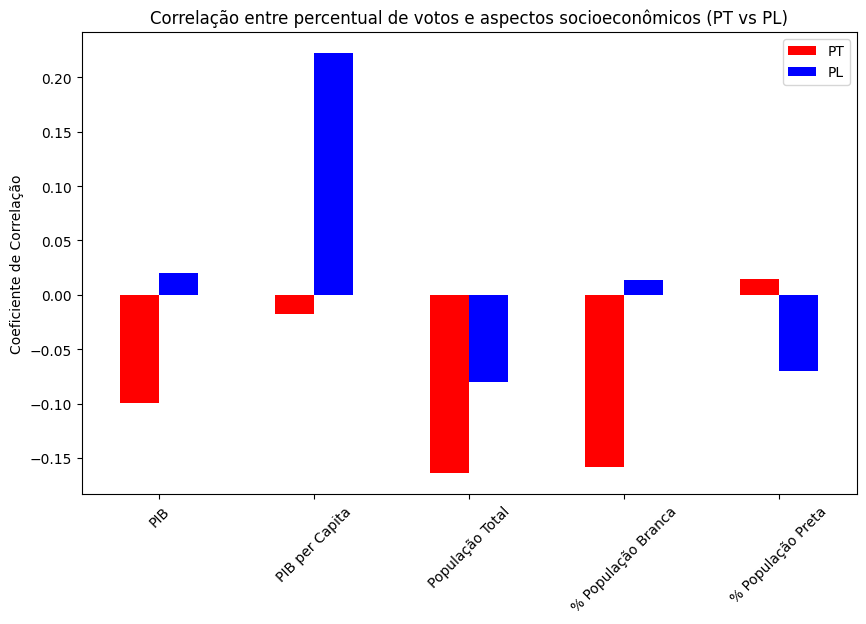

In [56]:
# Variáveis socioeconômicas para análise
variaveis_socioeconomicas = ['pib', 'pip_per_capita', 'tot_pop', 'perc_branca', 'perc_preta']

# Calculando a correlação
correlacoes_pt = dados_pt[variaveis_socioeconomicas].apply(lambda x: x.corr(dados_pt['perc_votos']))
correlacoes_pl = dados_pl[variaveis_socioeconomicas].apply(lambda x: x.corr(dados_pl['perc_votos']))

# Renomear as variáveis
mapa_nomes = {
    'pib': 'PIB',
    'pip_per_capita': 'PIB per Capita',
    'tot_pop': 'População Total',
    'perc_branca': '% População Branca',
    'perc_preta': '% População Preta'
}
correlacoes_pt.rename(index=mapa_nomes, inplace=True)
correlacoes_pl.rename(index=mapa_nomes, inplace=True)

comparacao_correlacoes = pd.DataFrame({
    'PT': correlacoes_pt,
    'PL': correlacoes_pl
})

# Plotando a comparação das correlações entre os partidos com as novas variáveis legíveis
comparacao_correlacoes.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Correlação entre percentual de votos e aspectos socioeconômicos (PT vs PL)')
plt.ylabel('Coeficiente de Correlação')
plt.xticks(rotation=45)
plt.show()
